# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### 데이터 셋 읽어오기

In [3]:
df_train = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [4]:
df_train

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,/Sląskie/Poland,AS,NaN,33747,End Customer,SMB,NaN,NaN,NaN,...,LGEPL,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,Others,694,False
59295,0.75,/Bogotá DC /Colombia,AS,0.040000,35420,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGECB,9 months ~ 1 year,0,0,0.000026,0.028777,public facility,NaN,39,False
59296,0.75,/Pisco/Peru,AS,0.040000,19249,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEPR,less than 3 months,0,0,0.000026,0.028777,public facility,NaN,125,False
59297,1.00,/santa cruz bolivia/Peru,AS,0.040000,40327,NaN,Enterprise,NaN,NaN,NaN,...,LGEPR,more than a year,0,0,0.000026,0.028777,public facility,NaN,134,False


## 2. 데이터 전처리

### 레이블 인코딩

In [5]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [6]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

In [7]:
df_all

,customer_country,business_subarea,business_area,business_unit,customer_type,enterprise,customer_job,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline
0,9070,28,0,0,10,0,420,32,180,349,699,9070,47,33,246
1,8406,0,0,0,10,0,303,32,180,349,699,8406,21,33,246
2,6535,17,0,0,10,0,160,27,238,349,699,6535,80,21,246
3,3388,44,0,0,10,0,166,32,318,349,699,3388,21,21,246
4,5799,86,0,0,29,0,84,32,180,349,699,5799,80,21,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,10650,86,6,0,33,0,468,30,183,349,699,10650,9,43,271
5267,16640,86,6,3,33,0,323,30,183,349,699,16640,74,50,271
5268,1079,86,6,0,29,0,166,58,180,349,699,1079,64,43,246
5269,24,86,6,3,9,1,323,58,52,349,699,24,74,12,271


다시 학습 데이터와 제출 데이터를 분리합니다.

In [8]:
for col in label_columns:  
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

In [9]:
df_train

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.00,9070,0,0.066667,32160,10,0,NaN,NaN,NaN,...,33,246,1,0,0.003079,0.026846,0,28,0,True
1,1.00,8406,0,0.066667,23122,10,0,12.0,NaN,NaN,...,33,246,1,0,0.003079,0.026846,0,0,1,True
2,1.00,6535,0,0.088889,1755,10,0,144.0,NaN,NaN,...,21,246,1,0,0.003079,0.026846,0,17,2,True
3,1.00,3388,0,0.088889,4919,10,0,NaN,NaN,NaN,...,21,246,1,0,0.003079,0.026846,0,44,3,True
4,1.00,5799,0,0.088889,17126,29,0,NaN,NaN,NaN,...,21,246,0,0,0.003079,0.026846,0,86,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,10287,0,NaN,33747,9,1,NaN,NaN,NaN,...,34,8,0,0,0.000026,0.028777,8,62,694,False
59295,0.75,3490,0,0.040000,35420,29,0,NaN,NaN,NaN,...,7,15,0,0,0.000026,0.028777,8,86,39,False
59296,0.75,8799,0,0.040000,19249,29,0,NaN,NaN,NaN,...,35,246,0,0,0.000026,0.028777,8,86,125,False
59297,1.00,12795,0,0.040000,40327,33,0,NaN,NaN,NaN,...,35,267,0,0,0.000026,0.028777,8,86,134,False


In [10]:
df_test

,id,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,19844,0.00,11,2,0.073248,47466,9,0,53.0,NaN,...,43,271,1,0,0.001183,0.049840,10,25,278,True
1,9738,0.25,15156,3,NaN,5405,9,1,NaN,NaN,...,50,271,0,0,0.000013,NaN,12,62,437,True
2,8491,1.00,53,2,NaN,13597,29,1,NaN,NaN,...,18,246,0,0,0.000060,0.131148,4,37,874,True
3,19895,0.50,893,2,0.118644,17204,33,0,NaN,NaN,...,50,267,0,0,0.001183,0.049840,10,86,194,False
4,10465,1.00,1402,2,0.074949,2329,9,0,2.0,1.0,...,43,246,1,1,0.003079,0.064566,0,28,167,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13855,0.50,10650,0,NaN,40292,33,0,10.0,NaN,...,43,271,0,0,NaN,NaN,6,86,97,False
5267,7979,0.25,16640,3,NaN,47466,33,0,0.0,NaN,...,50,271,0,0,NaN,NaN,6,86,438,False
5268,12887,0.75,1079,0,NaN,46227,29,0,NaN,NaN,...,43,246,0,0,NaN,NaN,6,86,97,True
5269,17530,0.00,24,3,NaN,45667,9,1,NaN,NaN,...,12,271,0,0,NaN,NaN,6,86,429,False


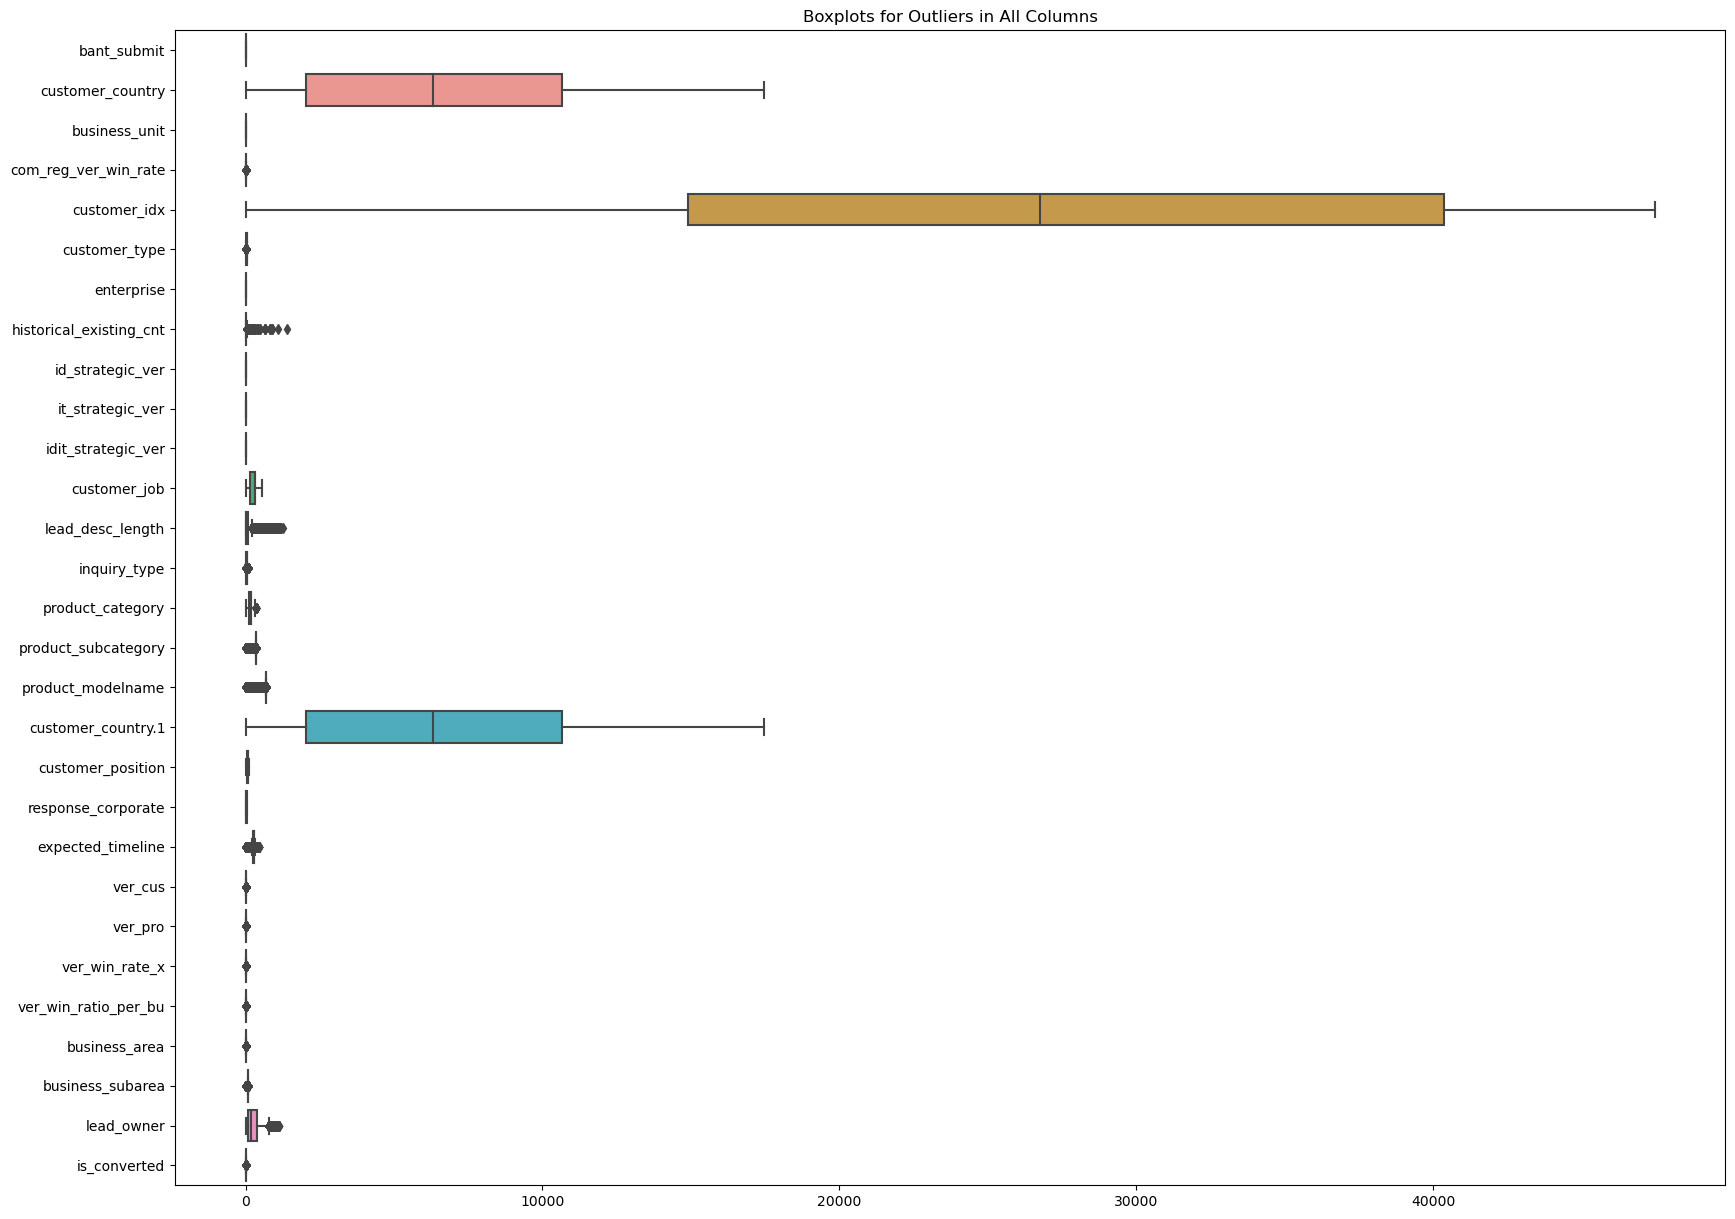

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 모든 열에 대한 상자그림 플로팅
plt.figure(figsize=(20, 15))
sns.boxplot(data=df_train, orient="h")  # orient="h"는 가로 방향 상자그림을 의미합니다
plt.title('Boxplots for Outliers in All Columns')
plt.show()


In [12]:
print(df_train.describe())

        bant_submit  customer_country  business_unit  com_reg_ver_win_rate  \
count  59299.000000      59299.000000   59299.000000          14568.000000   
mean       0.634593       7072.925041       1.320494              0.091685   
std        0.286066       4681.083682       1.172829              0.150988   
min        0.000000          0.000000       0.000000              0.003788   
25%        0.500000       2048.500000       0.000000              0.019900   
50%        0.500000       6298.000000       2.000000              0.049180   
75%        1.000000      10645.500000       2.000000              0.074949   
max        1.000000      17480.000000       4.000000              1.000000   

       customer_idx  customer_type    enterprise  historical_existing_cnt  \
count  59299.000000   59299.000000  59299.000000             13756.000000   
mean   27114.556333      27.765612      0.362839                19.912184   
std    14653.911888       9.794529      0.480823                44

        bant_submit  customer_country  business_unit  com_reg_ver_win_rate  \
count  59299.000000      59299.000000   59299.000000          14568.000000   
mean       0.634593       7072.925041       1.320494              0.091685   
std        0.286066       4681.083682       1.172829              0.150988   
min        0.000000          0.000000       0.000000              0.003788   
25%        0.500000       2048.500000       0.000000              0.019900   
50%        0.500000       6298.000000       2.000000              0.049180   
75%        1.000000      10645.500000       2.000000              0.074949   
max        1.000000      17480.000000       4.000000              1.000000   

       customer_idx  customer_type    enterprise  historical_existing_cnt  \
count  59299.000000   59299.000000  59299.000000             13756.000000   
mean   27114.556333      27.765612      0.362839                19.912184   
std    14653.911888       9.794529      0.480823                44

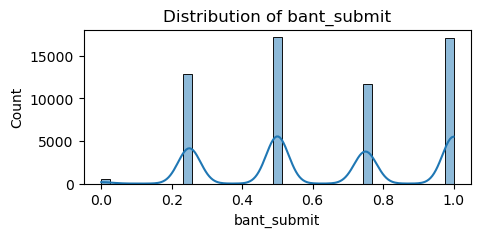

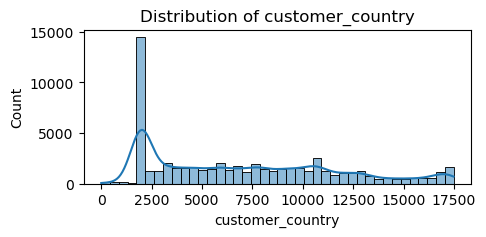

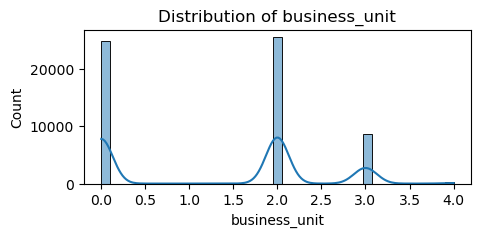

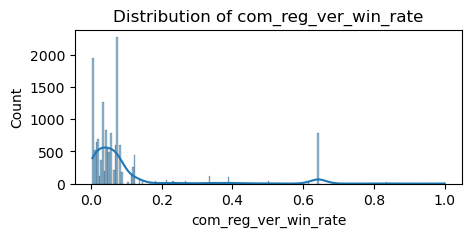

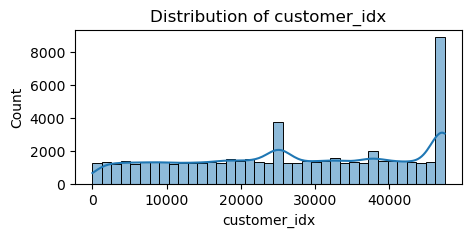

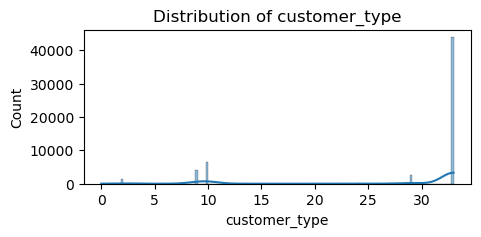

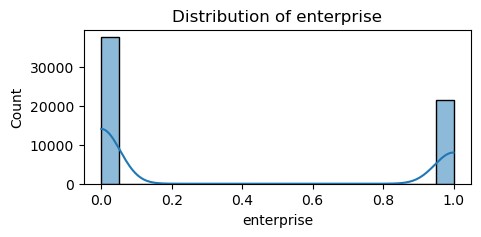

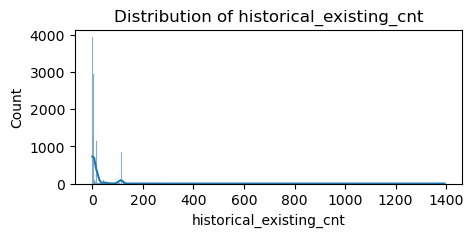

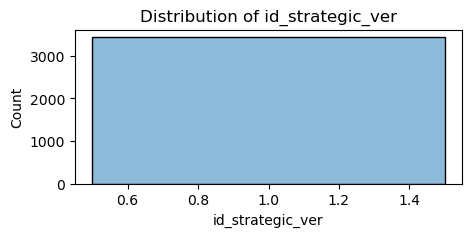

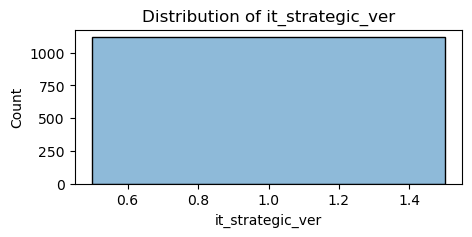

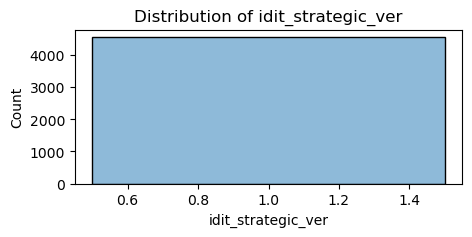

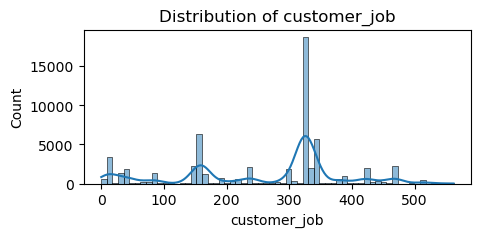

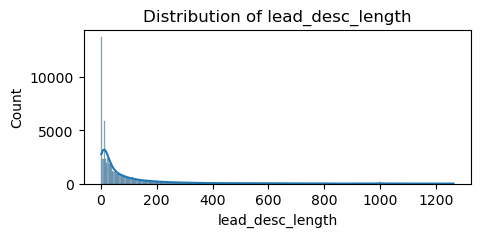

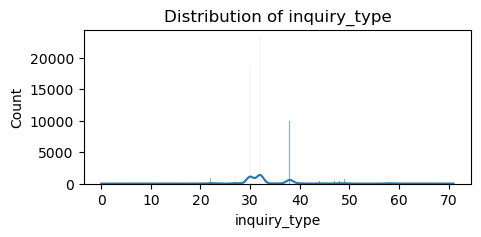

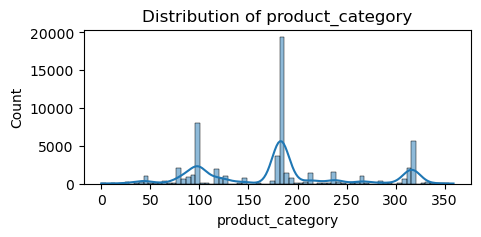

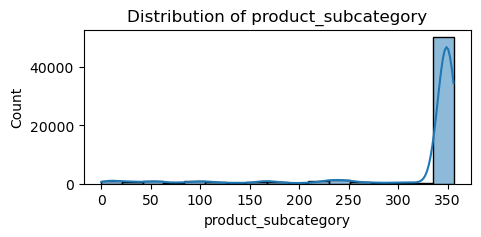

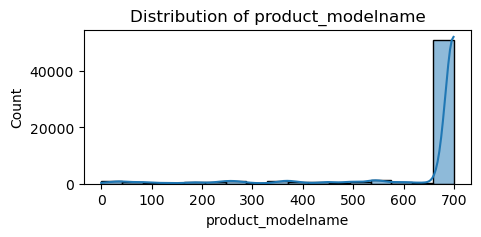

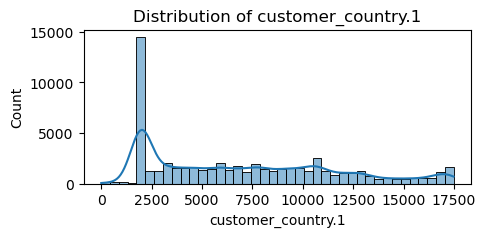

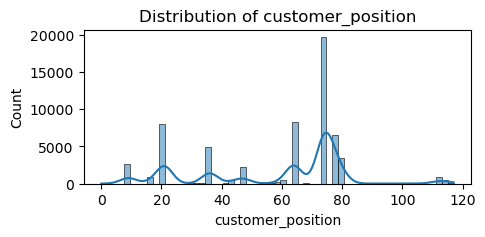

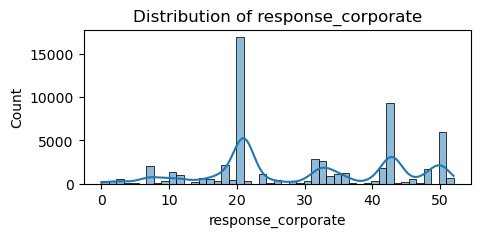

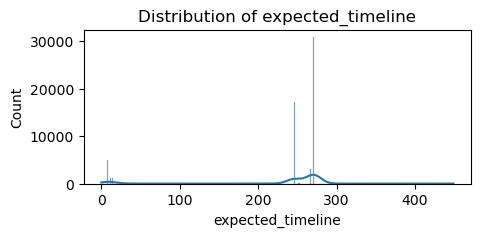

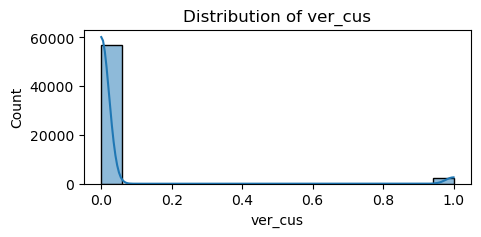

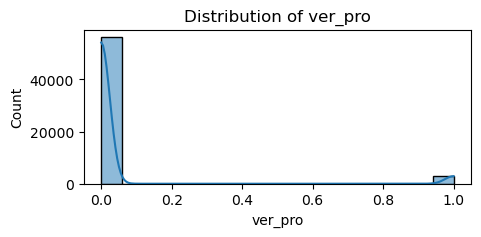

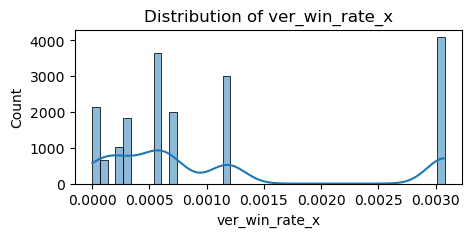

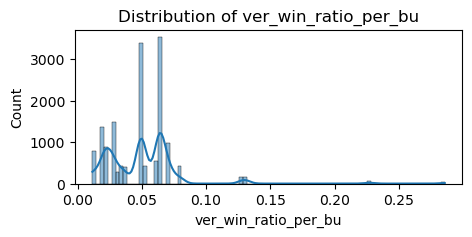

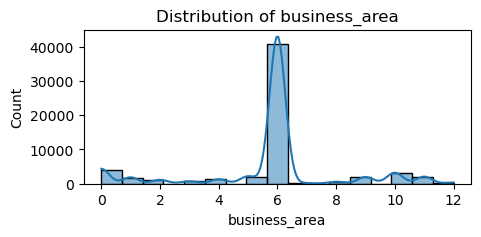

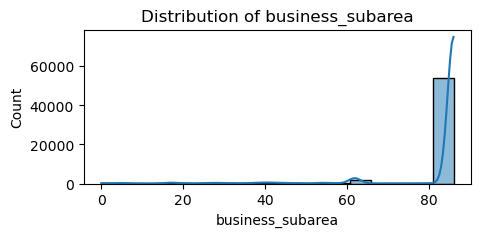

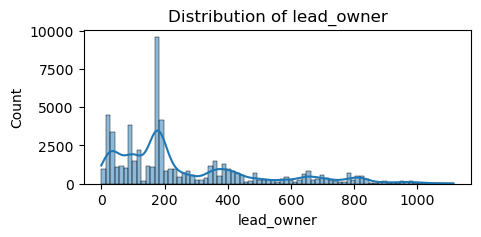

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


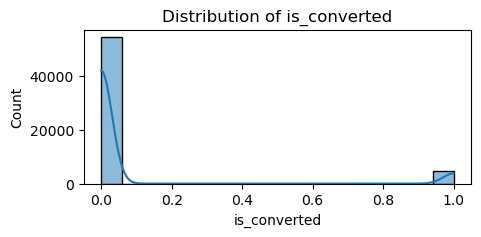

In [13]:

# 각 열에 대한 기술 통계량 출력
print(df_train.describe())

# 각 열의 분포 시각화 (히스토그램, 상자 그림)
for column in df_train.columns:
    plt.figure(figsize=(5, 2))
    sns.histplot(df_train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

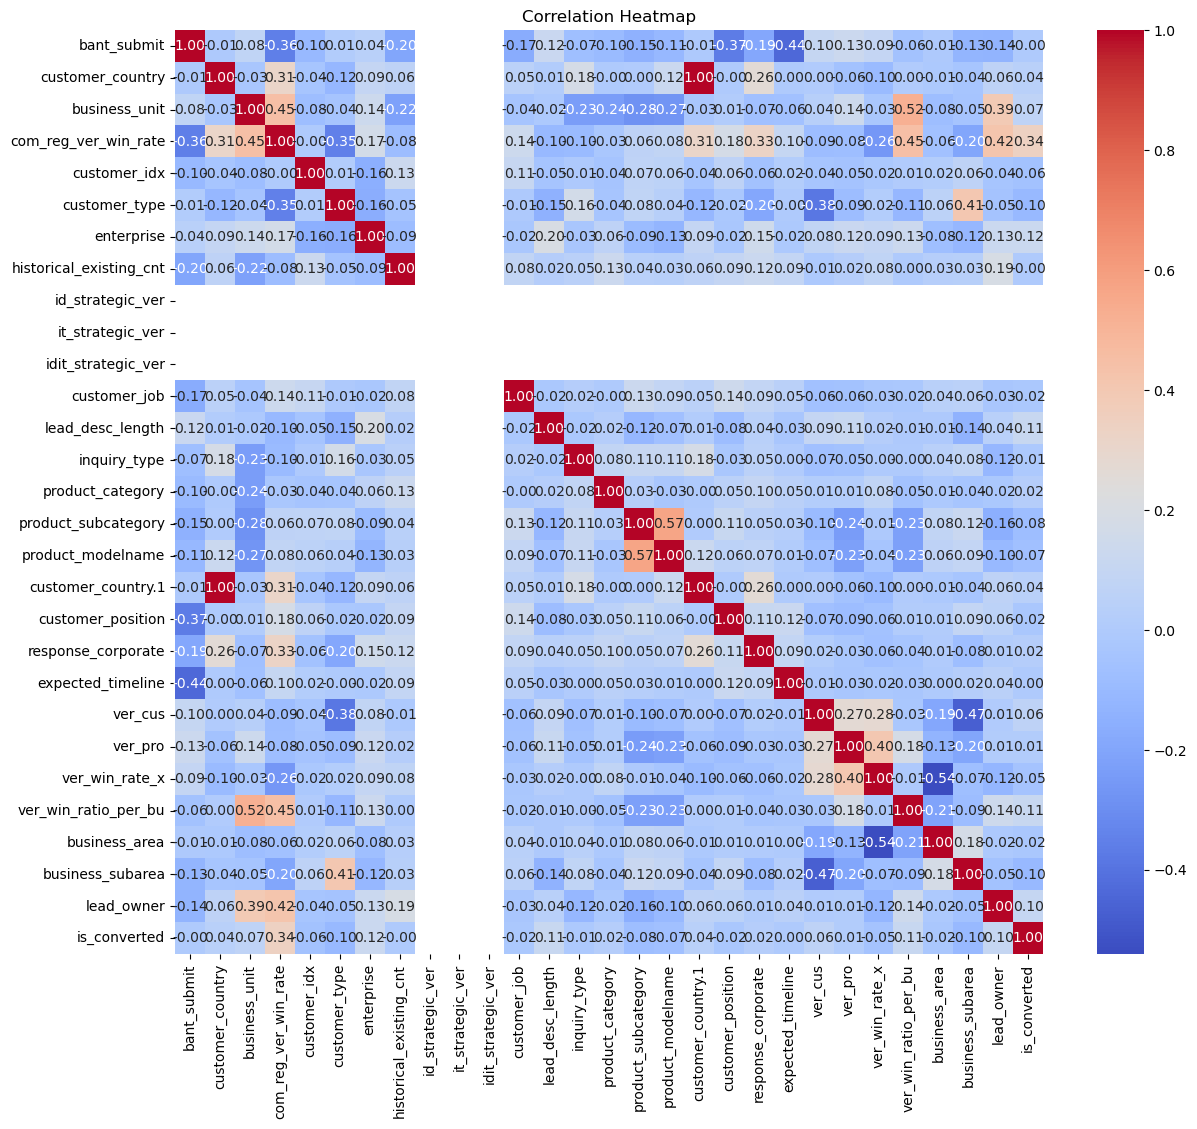

In [14]:
# 각 열의 상관 관계 히트맵
correlation_matrix = df_train.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# NaN 값 확인
nan_values = df_train.isnull().sum()
print("NaN Values:\n", nan_values)

df_train = df_train.fillna(0)

NaN Values:
 bant_submit                    0
customer_country               0
business_unit                  0
com_reg_ver_win_rate       44731
customer_idx                   0
customer_type                  0
enterprise                     0
historical_existing_cnt    45543
id_strategic_ver           55855
it_strategic_ver           58178
idit_strategic_ver         54734
customer_job                   0
lead_desc_length               0
inquiry_type                   0
product_category               0
product_subcategory            0
product_modelname              0
customer_country.1             0
customer_position              0
response_corporate             0
expected_timeline              0
ver_cus                        0
ver_pro                        0
ver_win_rate_x             40882
ver_win_ratio_per_bu       43995
business_area                  0
business_subarea               0
lead_owner                     0
is_converted                   0
dtype: int64


In [16]:
# 무한대 값 확인
inf_values = df_train[df_train == np.inf].sum()
print("Infinite Values:\n", inf_values)

Infinite Values:
 bant_submit                0.0
customer_country           0.0
business_unit              0.0
com_reg_ver_win_rate       0.0
customer_idx               0.0
customer_type              0.0
enterprise                 0.0
historical_existing_cnt    0.0
id_strategic_ver           0.0
it_strategic_ver           0.0
idit_strategic_ver         0.0
customer_job               0.0
lead_desc_length           0.0
inquiry_type               0.0
product_category           0.0
product_subcategory        0.0
product_modelname          0.0
customer_country.1         0.0
customer_position          0.0
response_corporate         0.0
expected_timeline          0.0
ver_cus                    0.0
ver_pro                    0.0
ver_win_rate_x             0.0
ver_win_ratio_per_bu       0.0
business_area              0.0
business_subarea           0.0
lead_owner                 0.0
is_converted                 0
dtype: object


1. 결측값 처리


2. 표준편차가 큰 열 처리:
해결방안:
표준화 (Standardization) 또는 정규화 (Normalization): 데이터의 스케일을 맞춰주어 표준편차가 큰 열의 영향을 줄일 수 있습니다. 주로 Z-score 표준화나 Min-Max 정규화를 사용합니다.



3. 이진 변수의 클래스 불균형 처리:
해결방안:
클래스 가중치 설정: 클래스의 불균형이 큰 경우, 모델 학습 시 클래스에 가중치를 부여하여 균형을 맞출 수 있습니다.

### 2-2. 학습, 검증 데이터 분리

In [18]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train.drop("is_converted", axis=1),
    df_train["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)





## 3. 모델 학습

### 모델 정의 

In [19]:
model = DecisionTreeClassifier()

### 모델 학습

In [20]:
model.fit(x_train.fillna(0), y_train)

DecisionTreeClassifier()

### 모델 성능 보기

In [21]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [22]:
pred = model.predict(x_val.fillna(0))
get_clf_eval(y_val, pred)

오차행렬:
 [[  735   212]
 [  259 10654]]

정확도: 0.9603
정밀도: 0.7394
재현율: 0.7761
F1: 0.7573


## 4. 제출하기

### 테스트 데이터 예측

In [23]:
# 예측에 필요한 데이터 분리
x_test = df_test.drop(["is_converted", "id"], axis=1)

In [24]:
test_pred = model.predict(x_test.fillna(0))
sum(test_pred) # True로 예측된 개수

1219

### 제출 파일 작성

In [25]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**